In [616]:
from sqlalchemy import create_engine
import pandas as pd

from sklearn.preprocessing import LabelEncoder
def get_db_engine():
    """
    Fonction pour établir la connexion à la base de données PostgreSQL
    """
    username = "postgres"       
    password = "post"        
    host = "localhost"         
    port = "5432"            
    database = "imad_ml"       
    
    connection_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"
    engine = create_engine(connection_string)
    return engine

def load_table_data(engine, table_name):
    """
    Fonction pour charger les données d'une table depuis PostgreSQL
    """
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql(query, con=engine)

# Récupération de l'objet engine
engine = get_db_engine()

# Chargement des données des différentes tables
annonce_df = load_table_data(engine, "annonce")
ville_df = load_table_data(engine, "city")
equipement_df = load_table_data(engine, "equipment")
annonce_equipement_df = load_table_data(engine, "annonce_equipment")

# Vérification que les données sont chargées correctement
print("Dataframe Annonces:")
display(annonce_df.head())

print("Dataframe Villes:")
display(ville_df.head())

print("Dataframe Equipements:")
display(equipement_df.head())

print("Dataframe Annonce_Equipement:")
display(annonce_equipement_df.head())





Dataframe Annonces:


,id,title,price,datetime,nb_rooms,nb_baths,surface_area,city_id
0,1,Appartement in Marrakech,48745.401188,2024-11-19 09:35:26,5,2,83.0,1
1,2,Appartement in Rabat,90320.588235,2023-06-30 12:29:51,9,5,139.0,2
2,3,Appartement in Kenitra,61608.897490,2023-09-17 20:06:26,6,3,87.0,3
3,4,Appartement in Tétouan,50986.584842,2023-05-22 10:32:06,5,3,73.0,4
4,5,Appartement in Martil,52098.569671,2023-10-09 21:29:55,5,3,98.0,5


Dataframe Villes:


,id,name
0,1,Marrakech
1,2,Rabat
2,3,Kenitra
3,4,Tétouan
4,5,Martil


Dataframe Equipements:


,id,name
0,1,"Climatisation, Sécurité, Duplex, Terrasse, Meu..."
1,2,"Ascenseur, Meublé, Chauffage"
2,3,"Duplex, Chauffage, Cuisine Équipée, Terrasse, ..."
3,4,"Chauffage, Concierge, Climatisation, Terrasse,..."
4,5,"Concierge, Balcon, Duplex, Parking, Terrasse, ..."


Dataframe Annonce_Equipement:


,annonce_id,equipment_id
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [617]:
# Examiner la structure de df_annonce
print("Structure de df_annonce:")
print(annonce_df.info())

# Afficher un aperçu des données
print("Aperçu des données :")
annonce_df.head(17)


Structure de df_annonce:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1600 non-null   int64         
 1   title         1600 non-null   object        
 2   price         1600 non-null   float64       
 3   datetime      1600 non-null   datetime64[ns]
 4   nb_rooms      1600 non-null   int64         
 5   nb_baths      1600 non-null   int64         
 6   surface_area  1600 non-null   float64       
 7   city_id       1600 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 100.1+ KB
None
Aperçu des données :


,id,title,price,datetime,nb_rooms,nb_baths,surface_area,city_id
0,1,Appartement in Marrakech,48745.401188,2024-11-19 09:35:26,5,2,83.0,1
1,2,Appartement in Rabat,90320.588235,2023-06-30 12:29:51,9,5,139.0,2
2,3,Appartement in Kenitra,61608.897490,2023-09-17 20:06:26,6,3,87.0,3
3,4,Appartement in Tétouan,50986.584842,2023-05-22 10:32:06,5,3,73.0,4
4,5,Appartement in Martil,52098.569671,2023-10-09 21:29:55,5,3,98.0,5
5,6,Appartement in Safi,46559.945203,2024-11-14 12:19:20,5,2,89.0,6
6,7,Appartement in Martil,45580.836122,2023-11-03 10:41:43,5,2,88.0,5
7,8,Appartement in Agadir,74655.386550,2023-06-09 02:24:20,8,4,92.0,7
8,9,Appartement in Bouznika,68835.144944,2023-11-12 20:39:33,7,4,121.0,8
9,10,Appartement in Agadir,52080.725778,2023-01-05 02:29:34,5,3,57.0,7


<Axes: xlabel='price', ylabel='Count'>

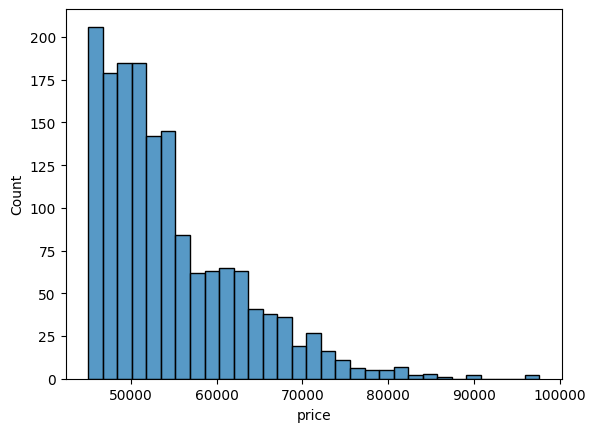

In [618]:
sns.histplot(annonce_df['price'])

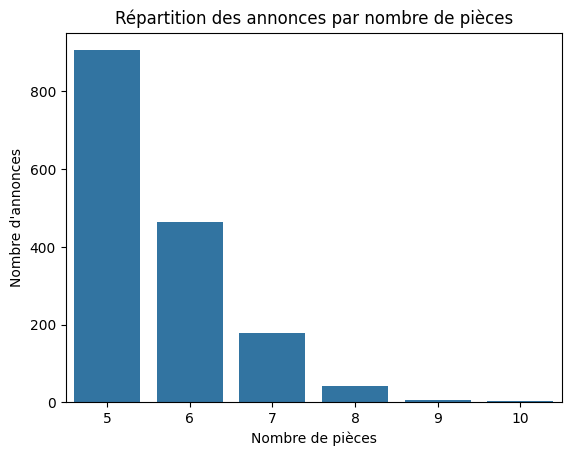

In [646]:
import matplotlib.pyplot as plt

# Calcul des comptages
room_counts = annonce_df['nb_rooms'].value_counts()

# Tracer avec sns.barplot
sns.barplot(x=room_counts.index, y=room_counts.values)

plt.xlabel("Nombre de pièces")
plt.ylabel("Nombre d'annonces")
plt.title("Répartition des annonces par nombre de pièces")
plt.show()


In [620]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(annonce_df.isnull().sum())

# Suppression ou traitement des valeurs non spécifiées pour le prix
annonce_df = annonce_df[annonce_df['price'] != 'PRIX NON SPÉCIFIÉ']

# Convertir les prix en numérique (si ce n'est pas déjà fait)
annonce_df['price'] = pd.to_numeric(annonce_df['price'], errors='coerce')


Valeurs manquantes par colonne :
id              0
title           0
price           0
datetime        0
nb_rooms        0
nb_baths        0
surface_area    0
city_id         0
dtype: int64


In [621]:
# Transformation de la colonne datetime
annonce_df['datetime'] = pd.to_datetime(annonce_df['datetime'], errors='coerce')
annonce_df['year'] = annonce_df['datetime'].dt.year
annonce_df['month'] = annonce_df['datetime'].dt.month
annonce_df['day'] = annonce_df['datetime'].dt.day


In [622]:
#from sklearn.preprocessing import LabelEncoder

# Encodage de city_id
#label_encoder = LabelEncoder()
#annonce_df['city_id_encoded'] = label_encoder.fit_transform(annonce_df['city_id'])
annonce = annonce_df[['id', 'price','nb_rooms','nb_baths','surface_area','city_id']]
annonce

,id,price,nb_rooms,nb_baths,surface_area,city_id
0,1,48745.401188,5,2,83.0,1
1,2,90320.588235,9,5,139.0,2
2,3,61608.897490,6,3,87.0,3
3,4,50986.584842,5,3,73.0,4
4,5,52098.569671,5,3,98.0,5
...,...,...,...,...,...,...
1595,1596,50783.869170,5,3,72.0,2
1596,1597,49494.085284,5,3,75.0,7
1597,1598,45794.193690,5,2,42.0,6
1598,1599,45856.582496,5,2,70.0,1


In [623]:
annonce = annonce.rename(columns={'id': 'annonce_id'})
annonce

,annonce_id,price,nb_rooms,nb_baths,surface_area,city_id
0,1,48745.401188,5,2,83.0,1
1,2,90320.588235,9,5,139.0,2
2,3,61608.897490,6,3,87.0,3
3,4,50986.584842,5,3,73.0,4
4,5,52098.569671,5,3,98.0,5
...,...,...,...,...,...,...
1595,1596,50783.869170,5,3,72.0,2
1596,1597,49494.085284,5,3,75.0,7
1597,1598,45794.193690,5,2,42.0,6
1598,1599,45856.582496,5,2,70.0,1


In [624]:
# annonce_df[annonce_df['has_elevator'] != 1]
equipement_df['name'] = equipement_df['name'].apply(lambda x: x.split(', '))

# Explode the list into separate rows (each equipment item gets its own row)
equipement_exploded = equipement_df.explode('name')

# Create a dummy variable for each unique equipment type
dummy_df = pd.get_dummies(equipement_exploded['name'])

# Add the 'id' column back for each equipment to associate with 'annonce_id'
dummy_df['id'] = equipement_exploded['id']

# Merge with the annonce_df to get the 'annonce_id'
result_df = pd.merge(dummy_df, annonce, left_on='id', right_on='annonce_id', how='left')

# Group by 'annonce_id' and aggregate by max to get 0 or 1 for each equipment type
final_df = result_df.groupby('annonce_id').max().reset_index()

# Show the final result


final_df

,annonce_id,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse,id,price,nb_rooms,nb_baths,surface_area,city_id
0,1,False,False,False,True,True,False,True,True,False,True,True,1,48745.401188,5,2,83.0,1
1,2,True,False,True,False,False,False,False,True,False,False,False,2,90320.588235,9,5,139.0,2
2,3,False,False,True,False,True,True,True,False,False,True,True,3,61608.897490,6,3,87.0,3
3,4,False,True,True,True,True,False,True,False,True,True,True,4,50986.584842,5,3,73.0,4
4,5,True,True,True,False,True,True,True,False,True,True,True,5,52098.569671,5,3,98.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,1367,True,True,False,True,False,False,False,False,True,True,True,1367,52158.249647,5,3,40.0,1
1367,1368,True,True,True,True,False,True,True,True,True,True,True,1368,58232.035460,6,3,76.0,3
1368,1369,False,True,False,False,False,False,True,True,True,False,False,1369,46796.831089,5,2,82.0,11
1369,1370,True,True,True,True,True,True,True,True,True,True,True,1370,51453.148854,5,3,96.0,1


In [625]:
final_df = final_df.astype(int)

# Show the final result
final_df

,annonce_id,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse,id,price,nb_rooms,nb_baths,surface_area,city_id
0,1,0,0,0,1,1,0,1,1,0,1,1,1,48745,5,2,83,1
1,2,1,0,1,0,0,0,0,1,0,0,0,2,90320,9,5,139,2
2,3,0,0,1,0,1,1,1,0,0,1,1,3,61608,6,3,87,3
3,4,0,1,1,1,1,0,1,0,1,1,1,4,50986,5,3,73,4
4,5,1,1,1,0,1,1,1,0,1,1,1,5,52098,5,3,98,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,1367,1,1,0,1,0,0,0,0,1,1,1,1367,52158,5,3,40,1
1367,1368,1,1,1,1,0,1,1,1,1,1,1,1368,58232,6,3,76,3
1368,1369,0,1,0,0,0,0,1,1,1,0,0,1369,46796,5,2,82,11
1369,1370,1,1,1,1,1,1,1,1,1,1,1,1370,51453,5,3,96,1


In [627]:
from sklearn.preprocessing import MinMaxScaler

# Normalisation des variables numériquesMinMaxScaler
numerical_cols = ['price', 'nb_rooms', 'nb_baths', 'surface_area','city_id']
scaler = MinMaxScaler()
final_df[numerical_cols] = scaler.fit_transform(final_df[numerical_cols])

In [628]:
final_df


,annonce_id,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse,id,price,nb_rooms,nb_baths,surface_area,city_id
0,1,0,0,0,1,1,0,1,1,0,1,1,1,0.070417,0.0,0.000000,0.364407,0.0
1,2,1,0,1,0,0,0,0,1,0,0,0,2,0.861869,0.8,1.000000,0.838983,0.1
2,3,0,0,1,0,1,1,1,0,0,1,1,3,0.315287,0.2,0.333333,0.398305,0.2
3,4,0,1,1,1,1,0,1,0,1,1,1,4,0.113078,0.0,0.333333,0.279661,0.3
4,5,1,1,1,0,1,1,1,0,1,1,1,5,0.134247,0.0,0.333333,0.491525,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,1367,1,1,0,1,0,0,0,0,1,1,1,1367,0.135389,0.0,0.333333,0.000000,0.0
1367,1368,1,1,1,1,0,1,1,1,1,1,1,1368,0.251018,0.2,0.333333,0.305085,0.2
1368,1369,0,1,0,0,0,0,1,1,1,0,0,1369,0.033314,0.0,0.000000,0.355932,1.0
1369,1370,1,1,1,1,1,1,1,1,1,1,1,1370,0.121968,0.0,0.333333,0.474576,0.0


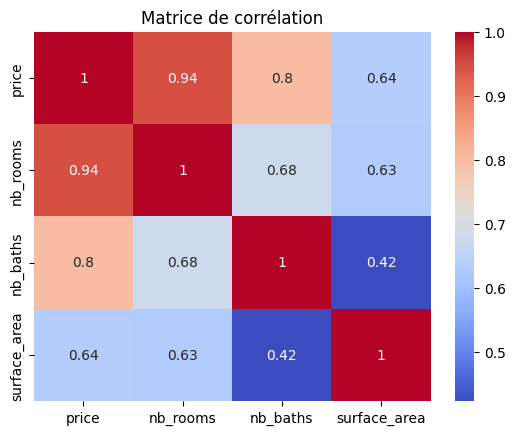

In [629]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation
corr_matrix = final_df[['price', 'nb_rooms', 'nb_baths', 'surface_area']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

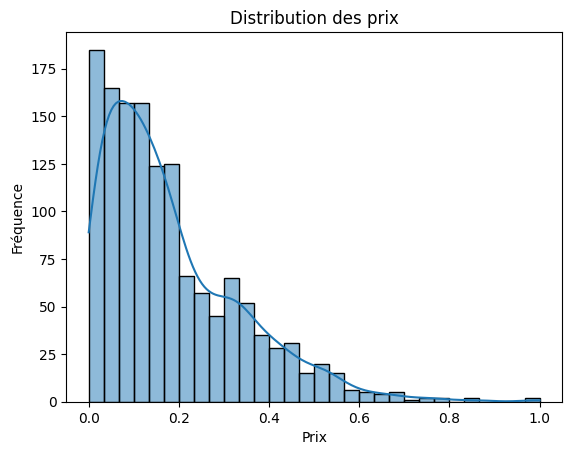

In [630]:
# Histogramme des prix
sns.histplot(final_df['price'], kde=True, bins=30)
plt.title("Distribution des prix")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()


In [586]:
# from sklearn.preprocessing import StandardScaler

# # Selecting the columns to normalize
# columns_to_normalize = ['nb_rooms', 'nb_baths', 'surface_area', 'city_id_encoded', 'price']

# # Create a scaler instance
# scaler = StandardScaler()

# # Fit and transform the data
# annonce_df[columns_to_normalize] = scaler.fit_transform(annonce_df[columns_to_normalize])

# # Display the normalized data
# print(annonce_df.head())


In [631]:
from sklearn.model_selection import train_test_split

# Sélection des variables
X = final_df[['nb_rooms', 'nb_baths', 'surface_area', 'city_id']]
y = final_df['price']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [632]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Loop through models and evaluate
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results.append({'Model': name, 'MSE': mse, 'R²': r2})

    # Print the results for each model
    print(f"{name}: MSE = {mse}, R² = {r2}")



Linear Regression: MSE = 0.00143804558392512, R² = 0.9353183480753336
Ridge Regression: MSE = 0.0014721546586243793, R² = 0.9337841607576076
Lasso Regression: MSE = 0.022563264290180882, R² = -0.014869920269319437
Decision Tree: MSE = 0.0013564678083577931, R² = 0.9389876234745405
Random Forest: MSE = 0.001398738958271048, R² = 0.9370863153131666
Support Vector Regressor: MSE = 0.0028266128772462453, R² = 0.8728621732888397


In [633]:
final_df

,annonce_id,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse,id,price,nb_rooms,nb_baths,surface_area,city_id
0,1,0,0,0,1,1,0,1,1,0,1,1,1,0.070417,0.0,0.000000,0.364407,0.0
1,2,1,0,1,0,0,0,0,1,0,0,0,2,0.861869,0.8,1.000000,0.838983,0.1
2,3,0,0,1,0,1,1,1,0,0,1,1,3,0.315287,0.2,0.333333,0.398305,0.2
3,4,0,1,1,1,1,0,1,0,1,1,1,4,0.113078,0.0,0.333333,0.279661,0.3
4,5,1,1,1,0,1,1,1,0,1,1,1,5,0.134247,0.0,0.333333,0.491525,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,1367,1,1,0,1,0,0,0,0,1,1,1,1367,0.135389,0.0,0.333333,0.000000,0.0
1367,1368,1,1,1,1,0,1,1,1,1,1,1,1368,0.251018,0.2,0.333333,0.305085,0.2
1368,1369,0,1,0,0,0,0,1,1,1,0,0,1369,0.033314,0.0,0.000000,0.355932,1.0
1369,1370,1,1,1,1,1,1,1,1,1,1,1,1370,0.121968,0.0,0.333333,0.474576,0.0


In [635]:
from imblearn.over_sampling import SMOTE

# Variables indépendantes et cible
X = final_df[['nb_rooms', 'nb_baths', 'surface_area', 'city_id']]
y = final_df['Climatisation']

# Gestion du déséquilibre avec SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train,X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [636]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entraînement du modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Prédiction
y_pred = clf.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9228395061728395
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       159
           1       0.92      0.93      0.92       165

    accuracy                           0.92       324
   macro avg       0.92      0.92      0.92       324
weighted avg       0.92      0.92      0.92       324



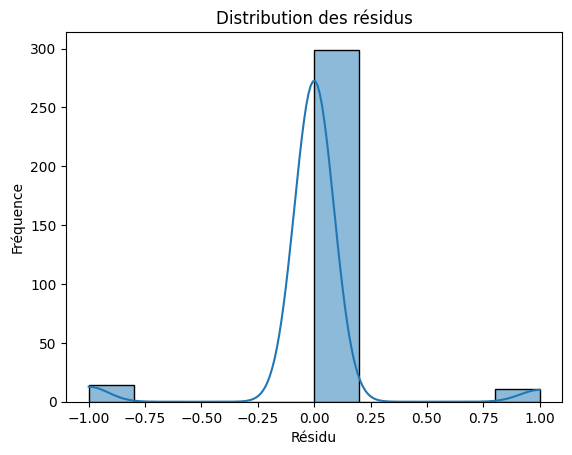

In [637]:
# Distribution des résidus
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()


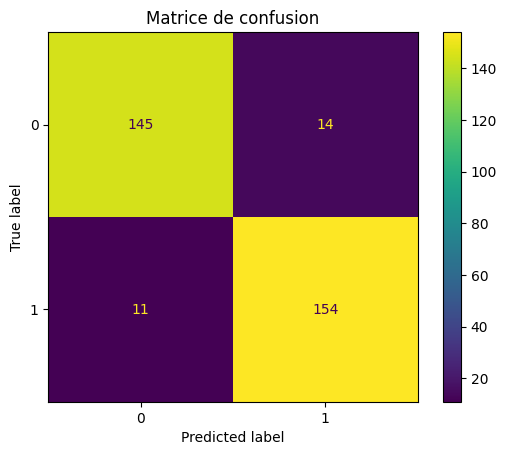

In [638]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matrice de confusion")
plt.show()
